In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from tqdm import tqdm
import seaborn as sns
sns.set_style("whitegrid")
from scipy.stats import norm

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

import seaborn as sns
from scipy.stats import spearmanr
from sklearn.metrics import average_precision_score # PR-AUC
from sklearn.ensemble import BaggingClassifier



In [4]:
df = pd.read_csv('/content/drive/MyDrive/features_asd_control_for_neural_network_course.csv')

In [3]:
df.shape

(3020, 4504)

In [23]:
df.Subject[1637]

'R0001'

In [26]:
corrs_iq_contr = []
for i in range(df.shape[1]):
  corrs_iq_contr.append(spearmanr(df[:1637].iloc[:,i], df[:1637]['IQ'])[0])

In [27]:
corrs_iq_asd = []
for i in range(df.shape[1]):
  corrs_iq_asd.append(spearmanr(df[1637:].iloc[:,i], df[1637:]['IQ'])[0])

In [30]:
corrs_age_contr = []
for i in range(df.shape[1]):
  corrs_age_contr.append(spearmanr(df[:1637].iloc[:,i], df[:1637]['Age'])[0])

In [31]:
corrs_age_asd = []
for i in range(df.shape[1]):
  corrs_age_asd.append(spearmanr(df[1637:].iloc[:,i], df[1637:]['Age'])[0])

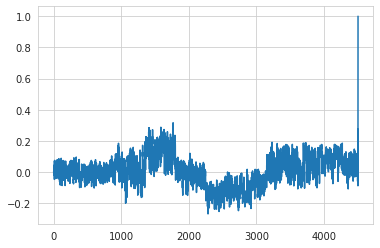

In [32]:
plt.plot(np.arange(df.shape[1]), corrs_iq_contr)

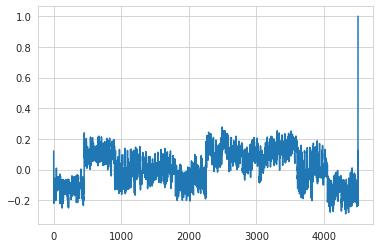

In [33]:
plt.plot(np.arange(df.shape[1]), corrs_iq_asd)

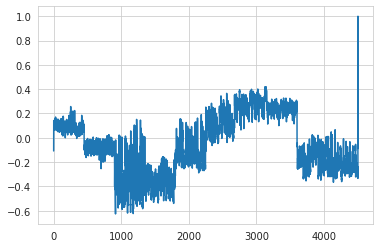

In [34]:
plt.plot(np.arange(df.shape[1]), corrs_age_contr)

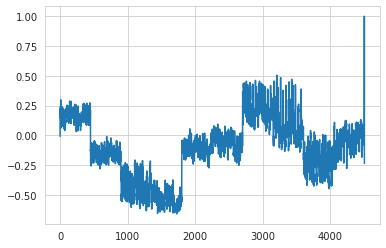

In [35]:
plt.plot(np.arange(df.shape[1]), corrs_age_asd)

In [44]:
residuals = []
for i in range(df.iloc[:,:-3].shape[1]):
  reg = LinearRegression().fit(df['Age'].values.reshape(-1, 1), df.iloc[:,:-3].iloc[:,i].values)
  prediction = reg.predict(df['Age'].values.reshape(-1, 1))
  residuals.append(df.iloc[:,:-3].iloc[:,i].values - prediction)

residuals = np.array(residuals).T

In [50]:
residuals2 = []
for i in range(residuals.shape[1]):
  reg = LinearRegression().fit(df['IQ'].values.reshape(-1, 1), residuals[:,i])
  prediction = reg.predict(df['IQ'].values.reshape(-1, 1))
  residuals2.append(residuals[:,i] - prediction)
  
residuals2 = np.array(residuals2).T

In [51]:
residuals2.shape

(3020, 4501)

In [ ]:
### DONT DO THIS

(array([1., 2., 0., 0., 2., 0., 1., 0., 1., 1., 1., 3., 0., 2., 0., 2., 1.,
        2., 2., 0., 2., 1., 1., 3., 1., 2., 2., 1., 1., 0., 1., 3., 1., 3.,
        0., 3., 3., 2., 0., 1., 1., 2., 2., 0., 1., 2., 1., 2., 2., 2., 1.,
        1., 2., 1., 2., 0., 2., 0., 1., 0., 1., 2., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 0., 1., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 2., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 6.28961749,  6.39236055,  6.49510361,  6.59784667,  6.70058973,
         6.80333279,  6.90607585,  7.00881891,  7.11156198,  7.21430504,
         7.3170481 ,  7.41979116,  7.52253422,  7.62527728,  7.72802034,
         7.8307634 ,  7.93350647,  8.03624953,  8.13899259,  8.24173565,
         8.34447871,  8.44722177,  8.54996483,  8.65270789,  8.75545096,
         8.85819402,  8.96093708,  9.06368014,  9.1664232 ,  9.26916626,
         9.37190932,  9.47465238,  9.57739544,  9.68013851,  9.78288157,
         9.88562463,  9.98836769, 1

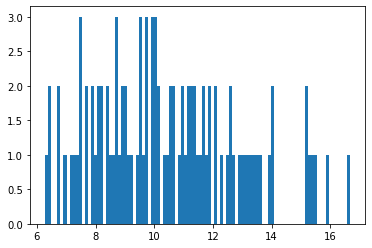

In [4]:
plt.hist(np.unique(df.Age), bins=101)

In [5]:
Age_bin = [round(a) for a in df['Age']]
for i in range(len(Age_bin)):
  if Age_bin[i] > 16:
    Age_bin[i] = 16

(array([134.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 273.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 347.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 387.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 490.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 432.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 268.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., 266.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 169.,
          0.,   0.,   0.,   0.,   0.,   0., 102.,   0.,   0.,   0.,   0.,
          0., 152.]),
 array([1.79175947, 1.80147065, 1.81118183, 1.82089301, 1.83060419,
        1.84031537, 1.85002655, 1.85973773, 1.86944892, 1.8791601 ,
        1.88887128, 1.89858246, 1.90829364, 1.91800482, 1.927716  ,
        1.93742718, 1.94713836, 1.95684954, 1.96656072, 1.9762719 ,
        1.98598308, 1.99569426, 2.005405

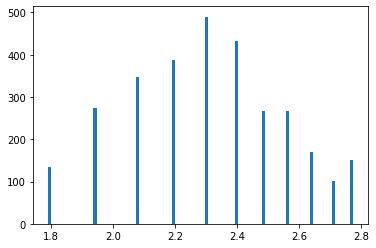

In [6]:
plt.hist(np.log(Age_bin), bins=101)

In [7]:
np.unique(df.IQ.values)

array([ 54,  56,  60,  61,  65,  69,  70,  72,  76,  77,  79,  82,  83,
        84,  86,  87,  88,  89,  90,  93,  95,  96,  99, 100, 102, 104,
       105, 107, 108, 109, 110, 111, 112, 113, 115, 116, 117, 118, 119,
       120, 121, 123, 124, 127, 128, 129, 130, 131, 132, 134, 136, 137,
       138, 141, 145, 160])

(array([ 16.,  42.,   0.,   0.,   0.,  25.,  25.,   0.,   0.,   0.,  91.,
          0.,   0.,   0.,  32.,  74.,   0.,  31.,   0.,   0.,  27.,  18.,
          0.,  23.,   0.,   0.,  32.,  13.,  33.,   0.,  65.,  34.,  16.,
        127.,  71.,   0.,   0.,  57.,   0.,  49.,  38.,   0.,  94.,  16.,
          0.,  45.,   0.,  16.,  69.,   0.,  91.,  33.,  96.,  44., 116.,
        172.,  39.,   0., 115.,  58.,  80.,  28.,  30., 131.,   0.,  70.,
         69.,   0.,   0., 125.,  59.,  63.,  41.,  98.,  33.,   0.,  64.,
          0.,  25.,  33.,  29.,   0.,  23.,   0.,   0.,   0.,  37.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  39.]),
 array([ 54.        ,  55.04950495,  56.0990099 ,  57.14851485,
         58.1980198 ,  59.24752475,  60.2970297 ,  61.34653465,
         62.3960396 ,  63.44554455,  64.4950495 ,  65.54455446,
         66.59405941,  67.64356436,  68.69306931,  69.74257426,
         70.79207921,  71.84158416,  72.89108911,  73.94

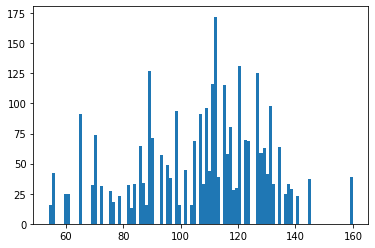

In [8]:
plt.hist(df.IQ.values, bins=101)

In [9]:
round(df['IQ'].values[0] / 10)

13

In [10]:
IQ_bin = [round(a/10)*10 for a in df['IQ'].values]
for i in range(len(IQ_bin)):
  if IQ_bin[i] > 140:
    IQ_bin[i] = 140
  if IQ_bin[i] < 60:
    IQ_bin[i] = 60

(array([199.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 137.,   0.,
          0.,   0.,   0.,   0.,   0.,   0., 146.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 370.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 327.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 591.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 581.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 483.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 186.]),
 array([-0.40546511, -0.37532132, -0.34517754, -0.31503375, -0.28488996,
        -0.25474618, -0.22460239, -0.1944586 , -0.16431482, -0.13417103,
        -0.10402724, -0.07388346, -0.04373967, -0.01359588,  0.0165479 ,
         0.04669169,  0.07683548,  0.10697926,  0.13712305,  0.16726684,
         0.19741062,

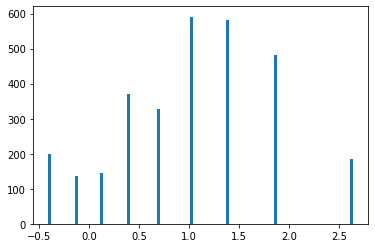

In [11]:
plt.hist(np.log(np.array(IQ_bin)/(150-np.array(IQ_bin))), bins=101)

In [ ]:
### STOP DONT DO THIS

In [54]:
df_my = pd.DataFrame(residuals2, columns = df.columns[:-3])

In [56]:
df_my = df_my.copy().drop(['Unnamed: 0', #'Age', 'IQ', 'Subject', 
                        'coef_35_45_unknown-lh', 'coef_35_45_unknown-rh',
                        'var_35_45_unknown-lh', 'var_35_45_unknown-rh',
                        'coef_2_40_unknown-lh', 'coef_2_40_unknown-rh',
                        'offset_2_40_unknown-lh', 'offset_2_40_unknown-rh',
                        'r2_2_40_unknown-lh', 'r2_2_40_unknown-rh',
                        'alpha_low_2_40_unknown-lh', 'alpha_low_2_40_unknown-rh',
                        'alpha_high_2_40_unknown-lh', 'alpha_high_2_40_unknown-rh',
                        'beta_2_40_unknown-lh', 'beta_2_40_unknown-rh',
                        'theta_2_40_unknown-lh', 'theta_2_40_unknown-rh',
                        'delta_2_40_unknown-lh', 'delta_2_40_unknown-rh'], axis=1)

In [60]:
df_my.columns[4][:10]

'coef_35_45'

In [63]:
cols_st = [i[:6] for i in df_my.columns]
np.unique(cols_st)

array(['alpha_', 'beta_2', 'coef_2', 'coef_3', 'delta_', 'offset',
       'r2_2_4', 'theta_', 'var_35'], dtype='<U6')

In [ ]:
corrs = []
for i in range()

In [18]:
vals = []
for i in range(450):
  vals.append(np.sum(np.abs(corr.iloc[i+1,:])))
vals2 = []
for i in range(len(corr[451:])):
  vals2.append(np.sum(np.abs(corr.iloc[i+451,:])))

In [19]:
#max corrs
n100_indep1 = np.argsort(np.array(vals))[:100]
n100_indep2 = np.argsort(np.array(vals2))[:100]
n100_indep = np.array(n100_indep1.tolist() + (n100_indep2+451).tolist())
#n100_indep = np.append(n100_indep, 4502)

In [20]:
n100_indep2

array([1159,  939, 1057, 1193, 1145, 1160, 1210, 1144, 1162, 1176,  997,
       1325, 1063,  985, 1006,  996,  920, 1219,  922, 1108, 1084, 1086,
       1161,  923,  942,  947,  941,  917,  921, 1285, 1180, 1211,  914,
        998,  988, 1177, 1194,  986, 1101, 1071, 1182,  981, 1284, 1208,
        919, 1218, 1163, 1107, 1220, 1308,  999, 1164, 1064, 1183,  948,
       1332, 1143, 1171, 1185, 1140, 1280, 1085,  958, 1229, 1181, 1128,
        960,  918,  969, 1301, 1315, 1326, 1209, 1168, 1222, 1005,  953,
        961, 1294,  902, 1296,  940, 1314,  938, 1102,  987, 1268, 1142,
       1334, 1109,  989, 1262, 1330, 1141, 1295, 1007,  910, 1277, 1307,
       1147])

In [21]:
df.columns[n100_indep]

Index(['coef_35_45_cuneus_4-rh', 'coef_35_45_lingual_6-rh',
       'coef_35_45_inferiortemporal_2-lh', 'coef_35_45_superiorfrontal_4-lh',
       'coef_35_45_lateralorbitofrontal_5-rh',
       'coef_35_45_lateralorbitofrontal_5-lh',
       'coef_35_45_middletemporal_7-rh', 'coef_35_45_superiortemporal_2-rh',
       'coef_35_45_superiortemporal_1-rh', 'coef_35_45_lingual_7-lh',
       ...
       'offset_2_40_middletemporal_8-rh', 'offset_2_40_precentral_4-lh',
       'offset_2_40_superiortemporal_4-lh', 'offset_2_40_fusiform_2-lh',
       'offset_2_40_superiorfrontal_11-lh',
       'offset_2_40_parstriangularis_2-rh',
       'offset_2_40_caudalmiddlefrontal_5-rh', 'offset_2_40_precuneus_8-lh',
       'offset_2_40_superiorfrontal_6-lh', 'offset_2_40_fusiform_8-lh'],
      dtype='object', length=200)

In [23]:
targets = []#['C' if i[0]=='K' else 'A' for i in df['Subject']]
for i in range(len(df['Subject'])):
  if df['Subject'].iloc[i][0]=='K':
    targets.append('C')
  elif df['Subject'].iloc[i][0]=='R':
    if df['IQ'].iloc[i]>85:
      targets.append('Ahigh')
    else:
      targets.append('Alow')


In [24]:
sum(np.array(targets)=='C')

1637

In [25]:
sum(np.array(targets)=='Alow')

482

In [26]:
sum(np.array(targets)=='Ahigh')

901

In [27]:
df.columns[2700]

'alpha_low_2_40_unknown-lh'

In [29]:
df_my.shape

(3020, 4480)

In [30]:
from scipy.stats import spearmanr
corrs = []
for i in range(df_my.shape[1]):
  corrs.append(spearmanr(df_my.iloc[:,i], df['Age'])[0])

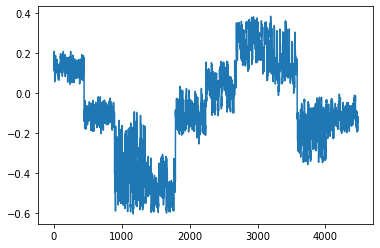

In [31]:
plt.plot(np.arange(df_my.shape[1]), corrs)

In [32]:
residuals = []
for i in range(df_my.shape[1]):
  reg = LinearRegression().fit(df['Age'].values.reshape(-1, 1), df_my.iloc[:,i].values)
  prediction = reg.predict(df['Age'].values.reshape(-1, 1))
  residuals.append(df_my.iloc[:,i].values - prediction)

In [33]:
df_my = pd.DataFrame(np.array(residuals).T)

In [34]:
df_my.head()

,0,1,2,3,4,5,6,7,8,9,...,4470,4471,4472,4473,4474,4475,4476,4477,4478,4479
0,-1.672668,-0.757401,-1.479512,2.094746,2.156082,1.783101,-1.152072,1.035233,-0.902916,-2.658647,...,-0.066860,-0.066911,-0.056098,-0.034612,-0.026031,0.000359,-0.000265,0.062647,-0.021445,-0.028798
1,-1.652304,-0.662455,-0.822120,1.206792,1.008991,0.458460,-1.585054,-0.787061,-2.444683,-4.359266,...,-0.025733,-0.049635,-0.042607,-0.012049,-0.013527,-0.002232,-0.014624,-0.056098,-0.014309,-0.008613
2,-1.485868,-2.396089,-1.679010,0.118095,0.250226,-0.084024,-0.967217,-1.280867,-3.169591,-2.188088,...,-0.003365,-0.015808,-0.034764,-0.014372,-0.017275,-0.044363,-0.042188,-0.065911,-0.021799,-0.018556
3,-1.350039,-1.764862,-0.803720,-2.305840,-2.204097,-2.009388,-0.145983,-0.705193,-2.333563,-2.755341,...,-0.073671,-0.077609,-0.044978,-0.019612,-0.043465,-0.039792,-0.016849,-0.059790,-0.021760,-0.006209
4,-2.253629,-2.385423,-1.310046,-0.780666,-1.168072,-1.514290,0.584326,-0.267934,-0.667875,-1.318409,...,-0.068411,-0.076096,-0.064516,-0.043877,-0.048308,-0.054803,-0.079903,-0.014990,-0.015785,-0.057245


In [35]:
# first set of points
X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:,n100_indep], targets, random_state=0)

In [36]:
clf1 = DecisionTreeClassifier(max_depth = 3)
clf1.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

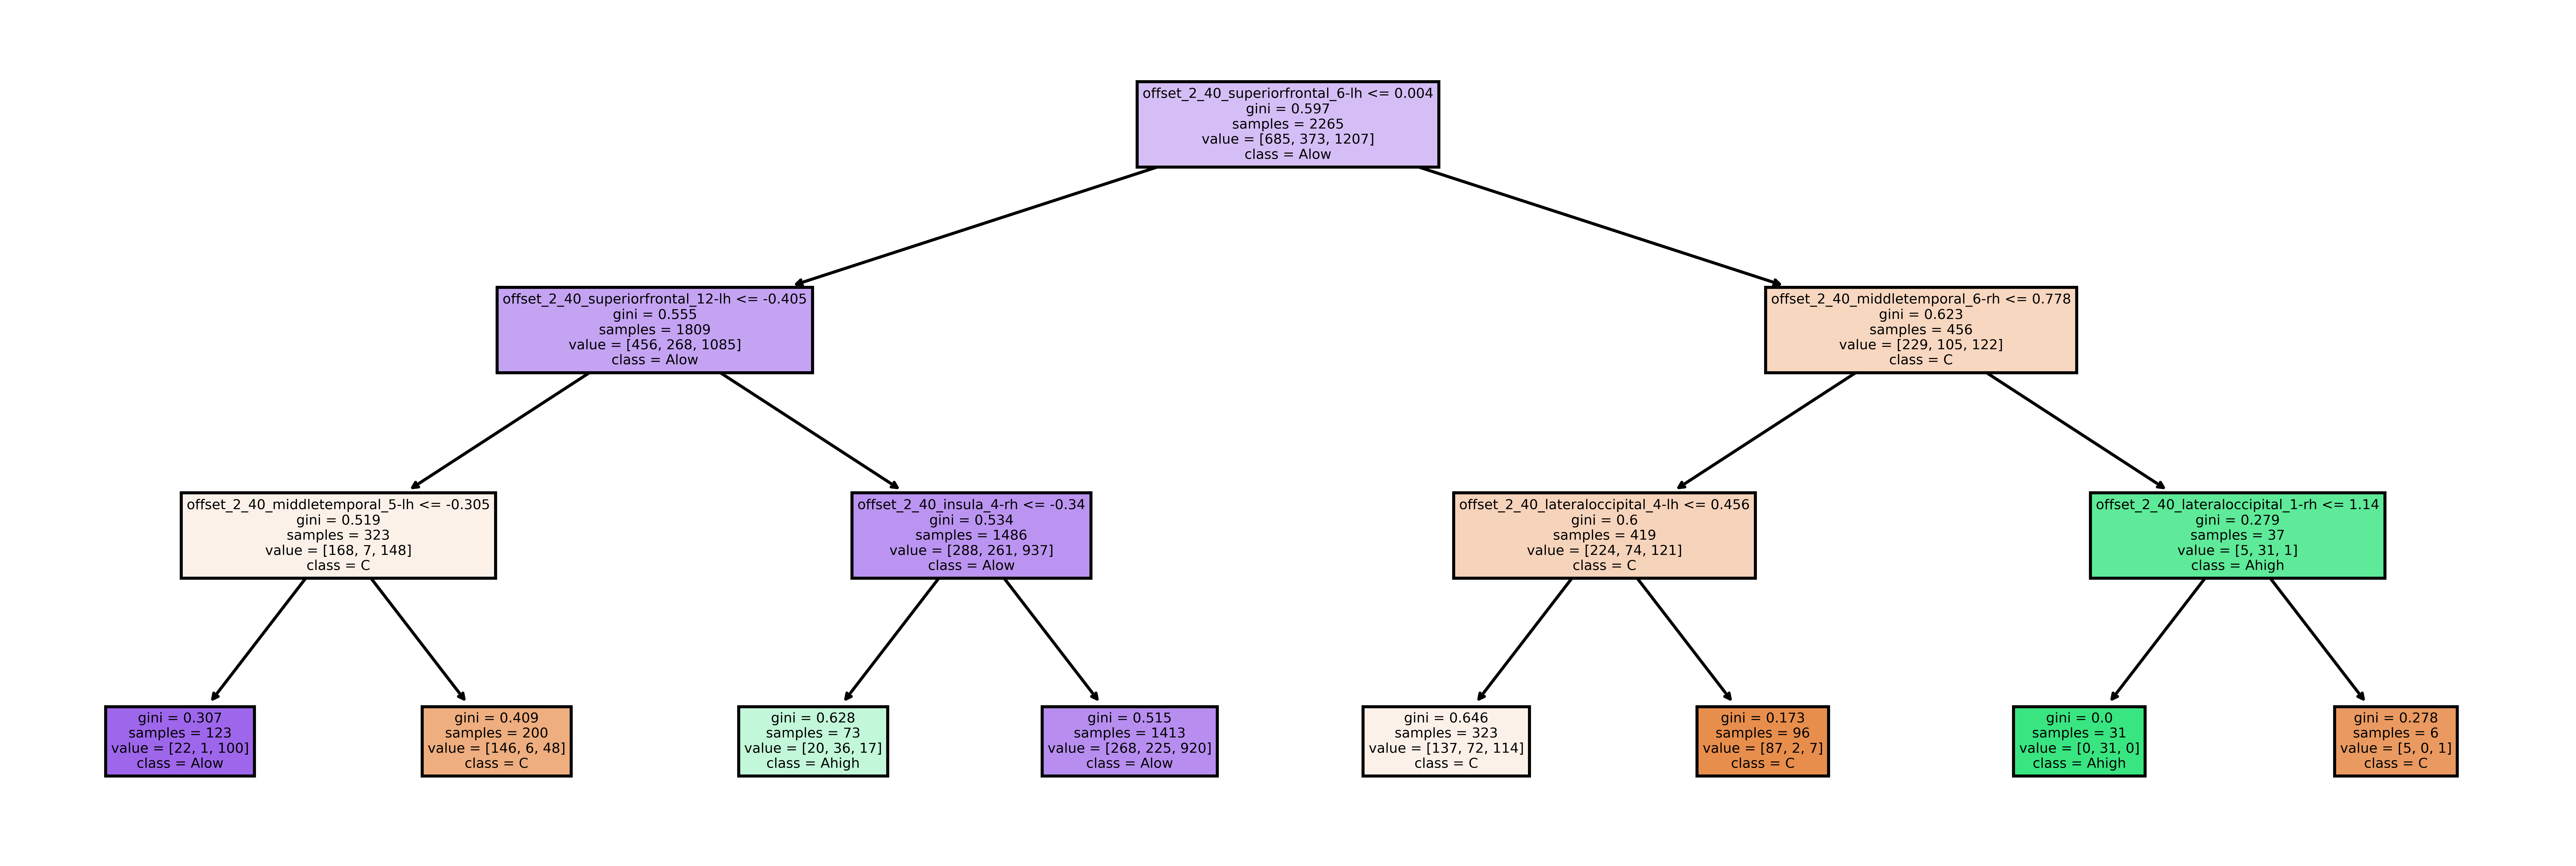

In [37]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (15,5), dpi=1000)
tree.plot_tree(clf1,
               feature_names = df.columns[n100_indep], 
               class_names = ['C', 'Ahigh', 'Alow'],
               filled = True)
plt.show()

In [38]:
y_pred_test = clf1.predict(X_test)
# Compute accuracy based on test samples
acc = accuracy_score(Y_test, y_pred_test)

In [39]:
acc

0.6662251655629139

In [40]:
len(targets)

3020

In [41]:
df_my.shape

(3020, 4480)

In [42]:
# 1. Importing the data from the .csv
# 2. Pre-processing the data and creating a feature set
# 3. Splitting the data into training and test data and labels

# first set of points
X_train, X_test, Y_train, Y_test = train_test_split(df_my, targets, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

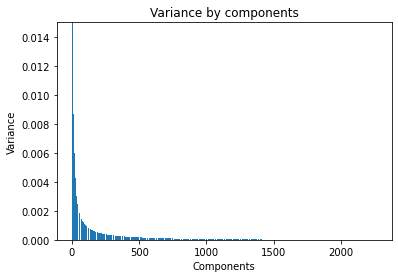

In [35]:
# performing PCA with default number of principal components.
pca = PCA() 
pca.fit(X_train) # fitting our PCA model with the training data.
#calculating the explained variance of each of the components.
evr = pca.explained_variance_ratio_ 

# We are plotting the explained variance ratios.
plt.bar(range(evr.shape[0]),evr)
plt.title('Variance by components')
plt.xlabel('Components')
plt.ylabel('Variance')
plt.ylim(0,0.015)
plt.show()

In [103]:
X_train.shape[1]

4480

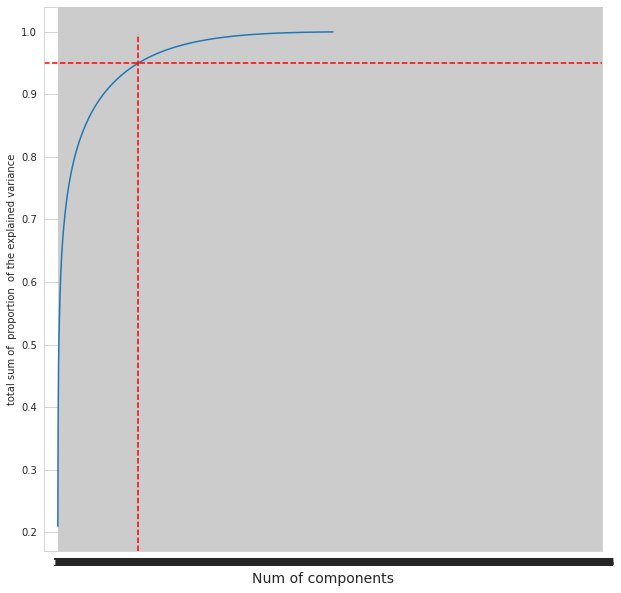

In [104]:
pca = PCA(n_components=2265)
pca.fit(X_train)

ths = 0.95
total_explained = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10,10))

plt.plot(np.arange(1, total_explained.shape[0] + 1), total_explained)
plt.axhline(xmin=0, xmax=1000, y=ths, c="red", ls="--")
chosen_number = np.where(total_explained >= 0.95)[0][0] + 1
plt.axvline(x=chosen_number, ymin=0, ymax=ths, c="red", ls="--")
plt.xticks(np.arange(1, X_train.shape[1]))
plt.ylabel('total sum of  proportion  of the explained variance')
plt.xlabel('Num of components', size = 14)

plt.show()

In [105]:
np.where(total_explained >= 0.95)[0][0] + 1

663

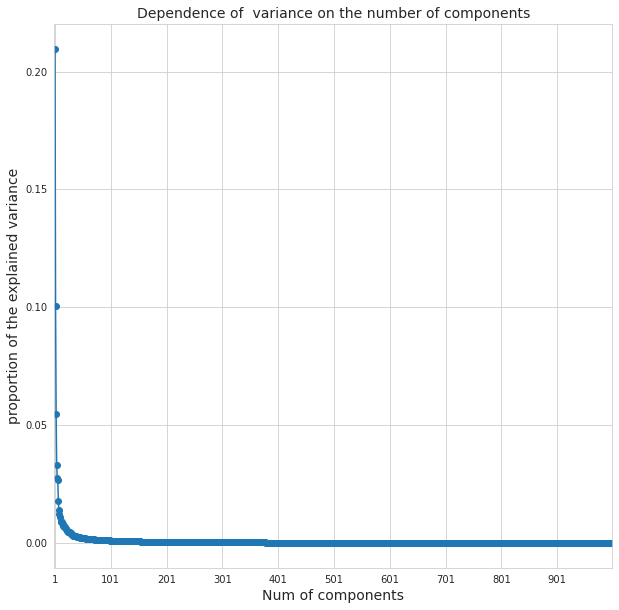

In [106]:
# 1. First, we create a PCA object that you fit to the training data.
# 2. Then, we create a a scatter plot where we plot the explained 
#    variance ratio as a function of the number of PCA components.
# 3. We also plot the explained variance ratio as a function of the 
#    number of components, but with a smooth curve.
# 4. Finally, we show the plot.

n_comp = 2265

explained = pca.explained_variance_ratio_

plt.figure(figsize=(10, 10))
plt.scatter(np.arange(1, n_comp + 1), explained)
plt.plot(np.arange(1, n_comp + 1), explained)
plt.title('Dependence of  variance on the number of components',size=14)
plt.xlabel('Num of components', size = 14)
plt.ylabel('proportion of the explained variance', size=14)
plt.xticks(np.arange(1, 1000,100))
plt.xlim(0,1000)
plt.show()

In [40]:
def shuffle_dataset(dataset):
    random_data =  {}
    for col in dataset.columns:
        random_data[col] = np.random.permutation(dataset.loc[:, col].values)
    random_data = pd.DataFrame(random_data)
    return random_data

def get_variance_by_chance(dataset, n_replics, n_components):
    variance_explained_by_chance = np.zeros((n_replics, n_components))
    for i in tqdm(range(n_replics)):
        random_data = shuffle_dataset(dataset)
        random_pca = PCA(n_components=n_components)
        random_pca.fit(random_data)
        variance_explained_by_chance[i, :] = random_pca.explained_variance_ratio_
    return variance_explained_by_chance

def get_pc_variance(dataset, n_components):
    pca = PCA(n_components=n_components)
    pca.fit(dataset)
    return pca.explained_variance_ratio_

def plot_mean_and_CI(ax, values, label, ci_level=0.95, alpha_transparency=0.5, color_mean=None, color_shading=None):
    mean = values.mean(axis=0)
    
    std = values.std(axis=0)
    n = values.shape[1]
    se = std / np.sqrt(n) 
    
    q_alpha = (1-ci_level) / 2
    ci_num = np.abs(norm.ppf(q_alpha, loc=0, scale=1))
    
    lb = mean -  ci_num * se
    ub = mean + ci_num * se
    
    # plot the shaded range of the confidence intervals
    ax.fill_between(range(mean.shape[0]), ub, lb,
                     color=color_shading, alpha=alpha_transparency)
    # plot the mean on top
    ax.plot(mean, c=color_mean, lw=3, label=label)
    
def plot_explained_variance(ax, variance):
    ax.plot(variance, label='real', lw=3)
    ax.scatter(np.arange(0, variance.shape[0]), variance)
    
def plot_variance_by_change(ax, variance_by_chance):
    plot_mean_and_CI(ax, variance_by_chance, label='chance', color_mean='red', color_shading='red')

def calc_permutat_pval(real_values, permut_values, eps=None):
    eps = eps or (1/(permut_values.shape[0] * 10))
    
    p_values = np.zeros_like(real_values)
    for i in range(0, p_values.shape[0], 1):
        p_values[i] = (permut_values[:, i] >= real_values[i]).mean() + eps
    return p_values

def plot_explained_vs_chance(ax, explained_variance, variance_by_chance, dataset_name, step=1):
    plot_explained_variance(ax, explained_variance)
    plot_variance_by_change(ax, variance_by_chance)

    ax.set_title(f'PCA {dataset_name}', size=25)
    ax.set_xlabel("Component number", size=15)
    ax.set_ylabel("Explained variance ration", size=15)
    ax.set_xticks(np.arange(0, explained_variance.shape[0], step))
    ax.set_xticklabels(np.arange(1, explained_variance.shape[0]+1, step), size=10)

    ax.tick_params(labelsize=10, size=8)
    ax.set_ylim(0, explained_variance[0] + 0.1 )
    ax.legend(fontsize=15)

def plot_pval_plot(ax, p_values, dataset_name, alpha_level = 0.05, logscale=True, step=1):
    if logscale:
        p_values = -np.log10(p_values)
        alpha_level = -np.log10(alpha_level)


 
    ax.set_title(f"PC significance, {dataset_name}", size=25)
    ax.plot(p_values, lw=3)
    ax.scatter(np.arange(0, p_values.shape[0]), p_values, lw=3)

    ax.set_xlabel("Component number", size=15)
    ax.set_ylabel("-log(pvalue + eps)", size=15)
    ax.set_xticks(np.arange(0, p_values.shape[0], step))
    
    ax.set_xticklabels(labels = np.arange(1, p_values.shape[0]+1, step), size=10)
    ax.tick_params(labelsize=10, size=8)
    

    ax.hlines(y=alpha_level, xmin=0, xmax=p_values.shape[0], color="red", linestyles="dashed", lw=3)
    
    
def pca_analysis(ax1, ax2, dataset, title, n_components = None, n_replics = 1000, step=1):
    n_components = n_components or dataset.shape[1]
    explained_variance = get_pc_variance(dataset, n_components)
    variance_by_chance = get_variance_by_chance(dataset, n_replics, n_components)
    p_values = calc_permutat_pval(explained_variance, variance_by_chance)
    plot_explained_vs_chance(ax1, explained_variance, variance_by_chance, title)
    plot_pval_plot(ax2, p_values, title)

100%|██████████| 10/10 [00:19<00:00,  1.91s/it]


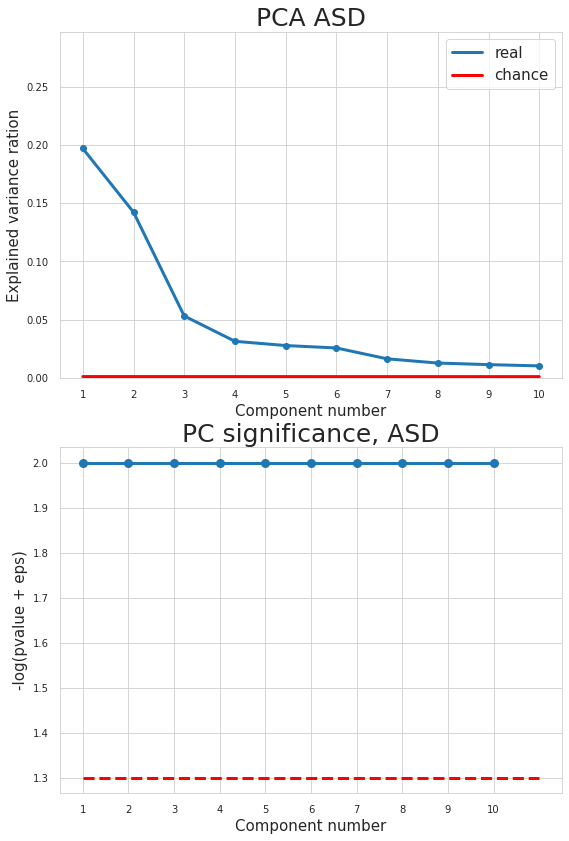

In [41]:
f, (ax1, ax2) = plt.subplots(2, 1)
f.set_figheight(9)
f.set_figwidth(9)
plt.subplots_adjust(top=1.3)
pca_analysis(ax1, ax2, pd.DataFrame(X_train), "ASD", n_replics=10, n_components=10)

In [42]:
first_component = pca.components_[4]

In [43]:
nn = np.argsort(np.abs(first_component))[-500:]

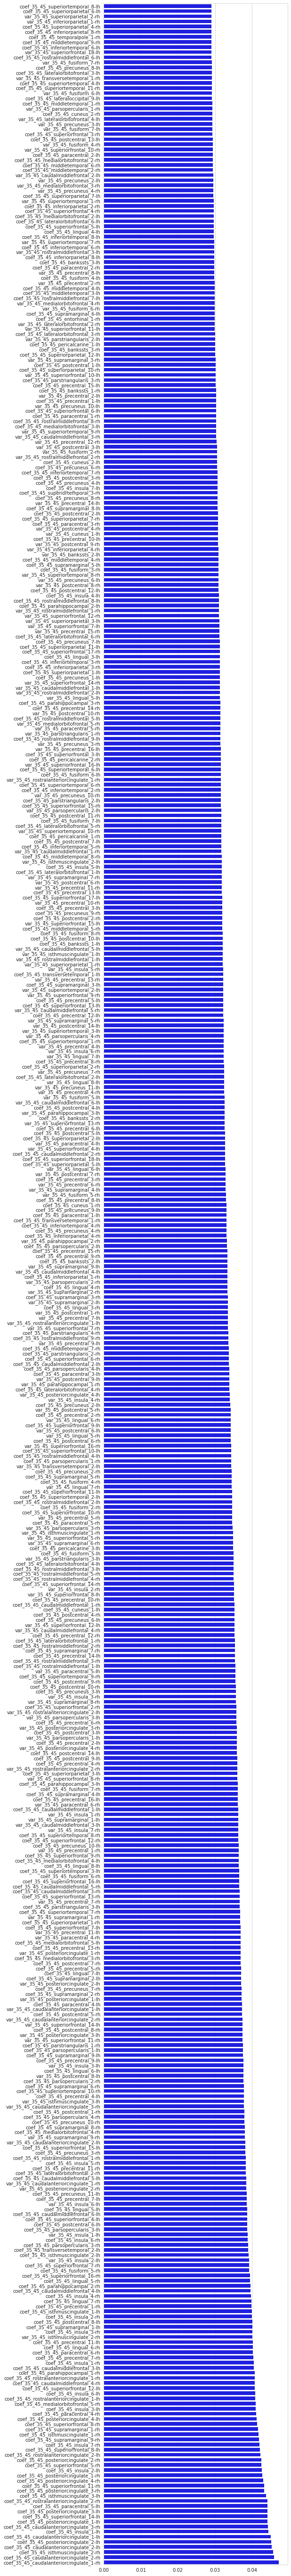

In [44]:
plt.figure(figsize= (7,100))

sns.barplot(x=np.abs(first_component[nn]), y=df_my.columns[nn],  orient='h', color='blue')
plt.show()

In [43]:
targets = []#['C' if i[0]=='K' else 'A' for i in df['Subject']]
for i in range(len(df['Subject'])):
  if df['Subject'].iloc[i][0]=='K':
    targets.append(0)
  elif df['Subject'].iloc[i][0]=='R':
    targets.append(1)
    #if df['IQ'].iloc[i]>85:
    #  targets.append('Ahigh')
    #else:
    #  targets.append('Alow')

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(df_my, targets, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [46]:
clf1 = DecisionTreeClassifier(max_depth = 3)
clf1.fit(X_train_pca, Y_train)

DecisionTreeClassifier(max_depth=3)

In [47]:
y_pred_test = clf1.predict(X_test_pca)
# Compute accuracy based on test samples
acc = accuracy_score(Y_test, y_pred_test)
acc

0.5390728476821192

In [54]:
def bootstrap_metric(X, 
                     Y,
                     metric_fn,
                     samples_cnt = 1000,
                     alpha = 0.05,
                     random_state = 42):
    size = len(X)
    
    np.random.seed(random_state)
    b_metric = np.zeros(samples_cnt)
    for it in range(samples_cnt):
        poses = np.random.choice(X.shape[0], size=X.shape[0], replace=True)
        
        X_boot = X[poses]
        Y_boot = Y[poses]
        
        m_val = metric_fn(X_boot, Y_boot)
        b_metric[it] = m_val
    
    return b_metric

In [52]:
def train_and_test_regressor(models, X_train, Y_train, X_test, Y_test):
    for name, model in models.items():
        print(f"Fitting {name}")
        model.fit(X_train, Y_train)
    predictions = {}
    for name, model in models.items():
        Y_pred = model.predict(X_test)
        predictions[name] = Y_pred
        
    boot_scores = {}

    for name, Y_pred in predictions.items():
        print(f"Calculating bootstrap score for {name}")
        boot_score = bootstrap_metric(Y_test, 
                                       Y_pred, 
                                       metric_fn=lambda X, Y: mean_squared_error(y_true=X, 
                                                                                      y_pred=Y))
        boot_scores[name] = boot_score
        
    
    results = pd.DataFrame(boot_scores)
    # cast to long format
    results = results.melt(value_vars=results.columns,
                       value_name="mse", 
                       var_name="model") 
    return results

In [64]:
models_rf = {}

models_rf['DT'] =  GridSearchCV(DecisionTreeRegressor(), 
                          {'max_depth':[1, 3, 5, 7, 10],
                           'min_samples_leaf': [1, 3, 5, 10]} 
                     )# add single decision tree for comparison

# this can be done faster, see warm_start parameter for this
# (https://stackoverflow.com/questions/42757892/how-to-use-warm-start)
for n_estimators in [3, 5, 10, 50, 100, 150, 250]:
    models_rf[f"RF{n_estimators}"] = RandomForestRegressor(n_estimators=n_estimators,
                                                           random_state=42, 
                                                           n_jobs=-1) # run in parallel

# Trainig models
results_rf = train_and_test_regressor(models_rf, X_train_pca, np.array(Y_train), X_test_pca, np.array(Y_test))

Fitting DT
Fitting RF3
Fitting RF5
Fitting RF10
Fitting RF50
Fitting RF100
Fitting RF150
Fitting RF250
Calculating bootstrap score for DT
Calculating bootstrap score for RF3
Calculating bootstrap score for RF5
Calculating bootstrap score for RF10
Calculating bootstrap score for RF50
Calculating bootstrap score for RF100
Calculating bootstrap score for RF150
Calculating bootstrap score for RF250


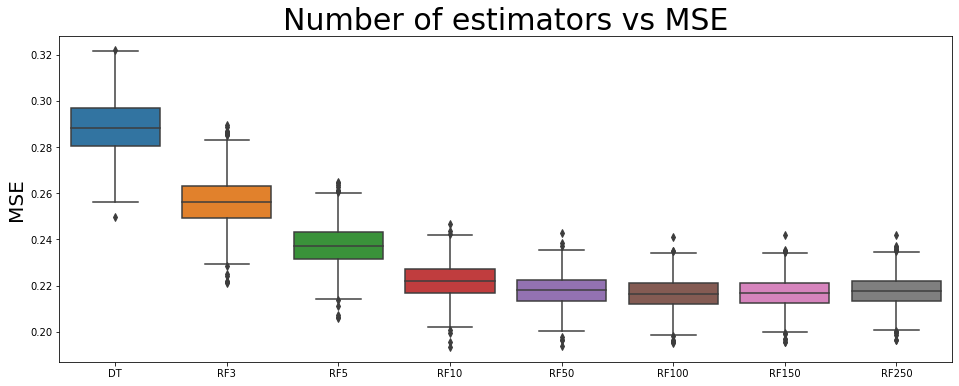

In [66]:
plt.figure(figsize=(16,6))
sns.boxplot(data=results_rf, y="mse", x="model")
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("Number of estimators vs MSE", size=30)
plt.show()

In [67]:
models_depth = {}

for depth in [1, 3, 5, 7, 9, 11, 13, None]:

    models_depth[f"DT_depth{depth}"] = DecisionTreeRegressor(max_depth=depth,
                                                             random_state=42)
    
    models_depth[f"RF_depth{depth}"] = RandomForestRegressor(n_estimators=100,
                                                             max_depth=depth,
                                                             random_state = 42, 
                                                             n_jobs=-1) # run in parallel

# Trainig models
results_depth = train_and_test_regressor(models_depth, X_train_pca, np.array(Y_train), X_test_pca, np.array(Y_test))

Fitting DT_depth1
Fitting RF_depth1
Fitting DT_depth3
Fitting RF_depth3
Fitting DT_depth5
Fitting RF_depth5
Fitting DT_depth7
Fitting RF_depth7
Fitting DT_depth9
Fitting RF_depth9
Fitting DT_depth11
Fitting RF_depth11
Fitting DT_depth13
Fitting RF_depth13
Fitting DT_depthNone
Fitting RF_depthNone
Calculating bootstrap score for DT_depth1
Calculating bootstrap score for RF_depth1
Calculating bootstrap score for DT_depth3
Calculating bootstrap score for RF_depth3
Calculating bootstrap score for DT_depth5
Calculating bootstrap score for RF_depth5
Calculating bootstrap score for DT_depth7
Calculating bootstrap score for RF_depth7
Calculating bootstrap score for DT_depth9
Calculating bootstrap score for RF_depth9
Calculating bootstrap score for DT_depth11
Calculating bootstrap score for RF_depth11
Calculating bootstrap score for DT_depth13
Calculating bootstrap score for RF_depth13
Calculating bootstrap score for DT_depthNone
Calculating bootstrap score for RF_depthNone


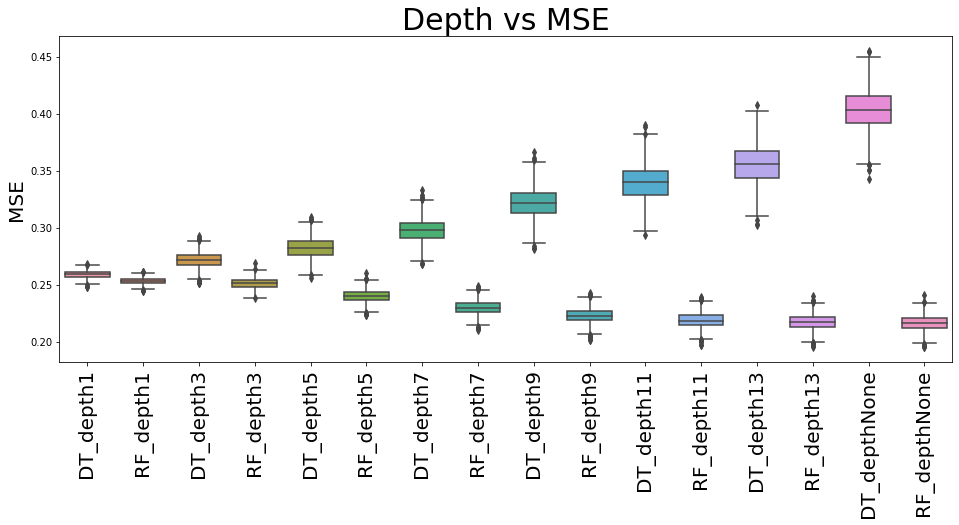

In [68]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data=results_depth, y="mse", x="model")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("Depth vs MSE", size=30)
plt.xticks(size=20)
plt.show()

In [69]:
models_min_samples= {}

for mn_sm in [1, 3, 5, 7, 10]:

    models_min_samples[f"DT_mnsamples{mn_sm}"] = DecisionTreeRegressor(max_depth=None,
                                                            min_samples_leaf=mn_sm,
                                                            random_state=42)
    
    models_min_samples[f"RF_mnsamples{mn_sm}"] = RandomForestRegressor(n_estimators=100,
                                                            max_depth=None,
                                                            min_samples_leaf=mn_sm,
                                                            random_state=42, 
                                                            n_jobs=-1) # run in parallel

# Trainig models
results_mn_samples = train_and_test_regressor(models_min_samples, X_train_pca, np.array(Y_train), X_test_pca, np.array(Y_test))

Fitting DT_mnsamples1
Fitting RF_mnsamples1
Fitting DT_mnsamples3
Fitting RF_mnsamples3
Fitting DT_mnsamples5
Fitting RF_mnsamples5
Fitting DT_mnsamples7
Fitting RF_mnsamples7
Fitting DT_mnsamples10
Fitting RF_mnsamples10
Calculating bootstrap score for DT_mnsamples1
Calculating bootstrap score for RF_mnsamples1
Calculating bootstrap score for DT_mnsamples3
Calculating bootstrap score for RF_mnsamples3
Calculating bootstrap score for DT_mnsamples5
Calculating bootstrap score for RF_mnsamples5
Calculating bootstrap score for DT_mnsamples7
Calculating bootstrap score for RF_mnsamples7
Calculating bootstrap score for DT_mnsamples10
Calculating bootstrap score for RF_mnsamples10


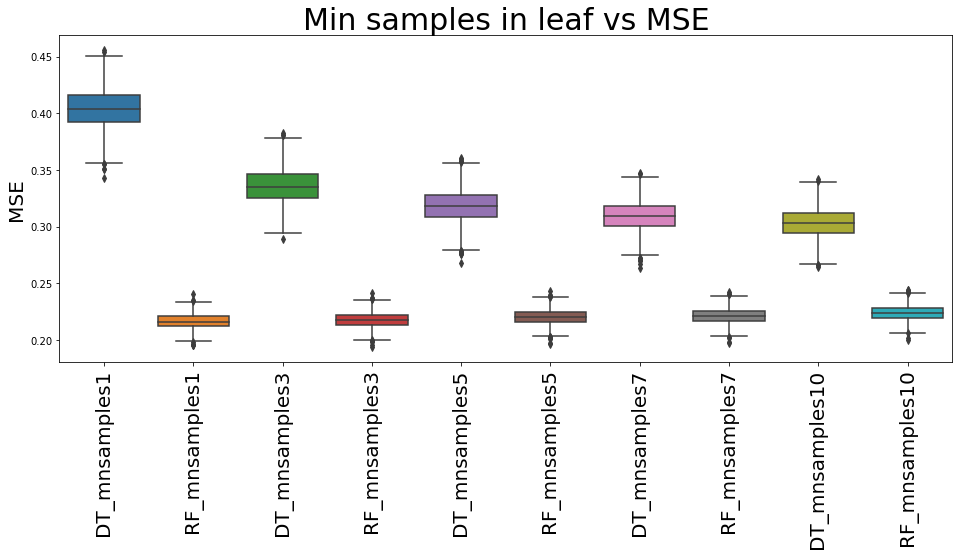

In [70]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data=results_mn_samples, y="mse", x="model")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("Min samples in leaf vs MSE", size=30)
plt.xticks(size=20)
plt.show()

In [71]:
rf_clf = RandomForestClassifier(n_estimators=500,
                               max_depth=15,
                               min_samples_leaf=0.5,
                               random_state=42, 
                               n_jobs=-1) # run in parallel

In [72]:
rf_clf.fit(X_train_pca, Y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=0.5, n_estimators=500,
                       n_jobs=-1, random_state=42)

In [73]:
y_pred_test = rf_clf.predict(X_test_pca)
# Compute accuracy based on test samples
acc = accuracy_score(Y_test, y_pred_test)
acc

0.5695364238410596

In [74]:
def get_rsm_sample(X, Y, f_num=None):
    size = X.shape[1]
    f_num = f_num or int(np.sqrt(size)) + 1 
    f_num = min(size, f_num)
    
    f_poses = np.random.choice(size, 
                             size=f_num,
                             replace=False)
    X_rsm = X[:, f_poses]
    Y_rsm = Y.copy()
    return X_rsm, Y_rsm, f_poses

class RSMBinaryClassifierEnsemble():
    def __init__(self, base_classifier, ensemble_size, random_state=42, max_features=None):
        self. base_classifier =  base_classifier
        self.ensemble_size = ensemble_size
        self.random_state = random_state
        self.max_features = max_features
        
        self.ensemble = []
        self.feature_poses = [] 
        # we had to keep track of features selected. In sklearn Random Forest, discussed below, 
        # another, more stable implementation is used.
        # they use `f_num` random features but in case no good split found, they try other features too.  
    
    def fit(self, X, Y):
        np.random.seed(self.random_state)
        for est_id in range(self.ensemble_size):
            X_boot, Y_boot, f_poses = get_rsm_sample(X, Y, f_num=self.max_features)
            self.feature_poses.append(f_poses)
            model = sklearn.clone(self.base_classifier) # create new base model
            model.fit(X_boot, Y_boot)
            self.ensemble.append(model)
    
    def predict_proba(self, X):
        if not self.ensemble:
            raise Exception("Unfitted model")
            
        Y_pred = 0
        for ind, est in enumerate(self.ensemble):
            Y_pred += est.predict(X[:, self.feature_poses[ind]])
        Y_pred = Y_pred / self.ensemble_size    
        return Y_pred
    
        
    def predict(self, X):
        Y_proba = self.predict_proba(X)
        Y_pred = np.round(Y_proba)
        return Y_pred
                    

In [75]:
svc_model = GridSearchCV(SVC(), {'kernel':('linear',
                                           'rbf'),
                                 'C':[0.01, 0.1, 1, 10]}
                         ).fit(X_train, Y_train)

logr_model = GridSearchCV(LogisticRegression(solver='liblinear', max_iter=100000), 
                          {'penalty':('l1', 
                                      'l2'),
                            'C':[0.01, 0.1, 1, 10, 100]}
                          ).fit(X_train_pca, Y_train)

# few objects in the leaf - poor estimates of class probabilities - the model is overtraining 
dt_model = GridSearchCV(DecisionTreeClassifier(), 
                          {'max_depth':[1, 3, 5, 7, 10],
                           'min_samples_leaf': [1, 3, 5, 10]}
                        ).fit(X_train_pca, Y_train)

In [76]:
rsm_dt = RSMBinaryClassifierEnsemble(dt_model.best_estimator_,
                                     ensemble_size=100)

rsm_logreg = RSMBinaryClassifierEnsemble(logr_model.best_estimator_,
                                         ensemble_size=100)

rsm_svc = RSMBinaryClassifierEnsemble(svc_model.best_estimator_,
                                      ensemble_size=100)

In [77]:
rsm_dt.fit(X_train_pca, np.array(Y_train))
rsm_logreg.fit(X_train_pca, np.array(Y_train))
rsm_svc.fit(X_train_pca, np.array(Y_train))

In [78]:
Y_pred_rlr = rsm_logreg.predict_proba(X_test_pca)
Y_pred_rsvc = rsm_svc.predict_proba(X_test_pca)
Y_pred_rdt = rsm_dt.predict_proba(X_test_pca) 

In [79]:
boot_score_rlogreg = bootstrap_metric(np.array(Y_test),
                                      Y_pred_rlr,
                                      metric_fn=lambda X, Y: 
                                      average_precision_score(y_true=X, y_score=Y))

boot_score_rsvc = bootstrap_metric(np.array(Y_test),
                                   Y_pred_rsvc ,
                                   metric_fn=lambda X, Y:
                                   average_precision_score(y_true=X, y_score=Y))

boot_score_rdt = bootstrap_metric(np.array(Y_test),
                                  Y_pred_rdt,
                                  metric_fn=lambda X, Y: 
                                  average_precision_score(y_true=X, y_score=Y))

alpha=0.10
print("RSM Logistic regression pr-auc 90%-ci: ", np.quantile(boot_score_rlogreg, q=[alpha/2, 1 - alpha/2]))
print("RSM SVC pr-auc 90%-ci:", np.quantile(boot_score_rsvc, q=[alpha/2, 1 - alpha/2]))
print("RSM DecisionTreeClassifier pr-auc 90%-ci:", np.quantile(boot_score_rdt, q=[alpha/2, 1 - alpha/2]))

RSM Logistic regression pr-auc 90%-ci:  [0.44976389 0.54250403]
RSM SVC pr-auc 90%-ci: [0.6483805  0.73300576]
RSM DecisionTreeClassifier pr-auc 90%-ci: [0.62161324 0.70708991]


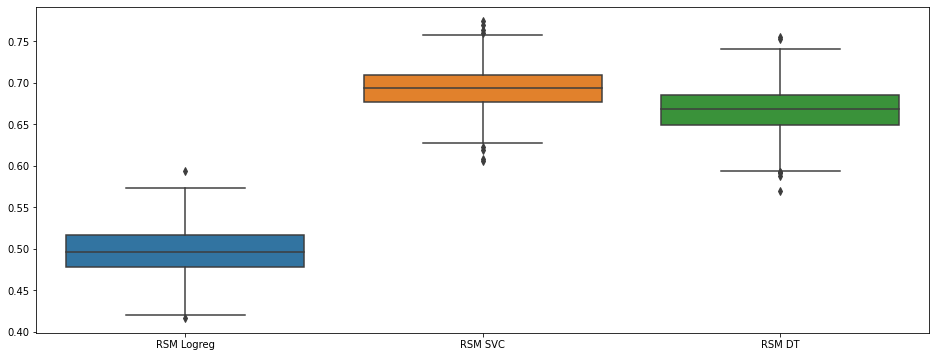

In [80]:
plt.figure(figsize=(16,6))
sns.boxplot(y=np.concatenate([
                              boot_score_rlogreg,
                              boot_score_rsvc,
                              boot_score_rdt
                             ]),
             x=[x for x in  (
              "RSM Logreg", 
              "RSM SVC", 
              "RSM DT") for y in range(1000)])
plt.show()

In [81]:
models = {}


svc_model = GridSearchCV(SVC(), {'kernel':('linear', 
                                           'rbf'),
                                 'C':[0.01, 0.1, 1, 10]}
                         ).fit(X_train_pca, np.array(Y_train))
models['SVC'] = svc_model


logr_model = GridSearchCV(LogisticRegression(solver='liblinear', max_iter=100000), 
                          {'penalty':('l1', 
                                      'l2'),
                            'C':[0.01, 0.1, 1, 10, 100]}
                          ).fit(X_train_pca, np.array(Y_train))
models['LogReg'] = logr_model

# few objects in the leaf - poor estimates of class probabilities - the model is overtraining
dt_model = GridSearchCV(DecisionTreeClassifier(), 
                          {'max_depth':[1, 3, 5, 7, 10],
                           'min_samples_leaf': [1, 3, 5, 10]}
                        ).fit(X_train_pca, np.array(Y_train))
models['DT'] = dt_model


bagging_dt = BaggingClassifier(dt_model.best_estimator_, 
                               n_estimators=100,
                               random_state=42)
models["Bagging DT"] = bagging_dt


bagging_logr = BaggingClassifier(logr_model.best_estimator_, 
                                 n_estimators=100,
                                 random_state=42)
models["Bagging LogReg"] = bagging_logr


bagging_svc = BaggingClassifier(svc_model.best_estimator_,
                                n_estimators=100,
                                random_state=42)
models["Bagging SVC"] = bagging_svc 


In [82]:
sqrt_features = int(np.sqrt(X_train_pca.shape[1])) + 1


rsm_dt = BaggingClassifier(dt_model.best_estimator_, 
                           n_estimators=100, 
                           bootstrap=False,
                           max_features=sqrt_features,
                           random_state=42)
models["RSM DT"] =  rsm_dt


rsm_logreg = BaggingClassifier(logr_model.best_estimator_,
                               n_estimators=100,
                               bootstrap=False,
                               max_features=sqrt_features,
                               random_state=42)
models["RSM LogReg"] = rsm_logreg


rsm_svc = BaggingClassifier(svc_model.best_estimator_, 
                            n_estimators=100, 
                            bootstrap=False,
                            max_features=sqrt_features,
                            random_state=42)
models["RSM SVC"] = rsm_svc

# Both Bagging and RSM 
bag_rsm_dt = BaggingClassifier(dt_model.best_estimator_, 
                               n_estimators=100, 
                               bootstrap=True,
                               max_features=sqrt_features,
                               random_state=42)
models["BagRSM DT"] = bag_rsm_dt


bag_rsm_logreg = BaggingClassifier(logr_model.best_estimator_, 
                                   n_estimators=100, 
                                   bootstrap=True,
                                   max_features=sqrt_features,
                                   random_state=42)
models["BagRSM LogReg"] = bag_rsm_logreg


bag_rsm_svc = BaggingClassifier(svc_model.best_estimator_, 
                                n_estimators=100, 
                                bootstrap=True,
                                max_features=sqrt_features,
                                random_state=42)
models["BagRSM SVC"] = bag_rsm_svc

In [90]:
# Trainig models
for name, model in models.items():
    model.fit(X_train_pca, Y_train)

In [91]:
predictions = {}

for name, model in models.items():
    if name != "SVC":
        Y_pred = model.predict_proba(X_test_pca)[:, 1]
    else:
        Y_pred = model.decision_function(X_test_pca)
    predictions[name] = Y_pred

In [92]:
boot_scores = {}

for name, Y_pred in predictions.items():
    boot_score = bootstrap_metric(np.array(Y_test), 
                                   Y_pred, 
                                   metric_fn=lambda X, Y:
                                  average_precision_score(y_true=X, y_score=Y))
    boot_scores[name] = boot_score

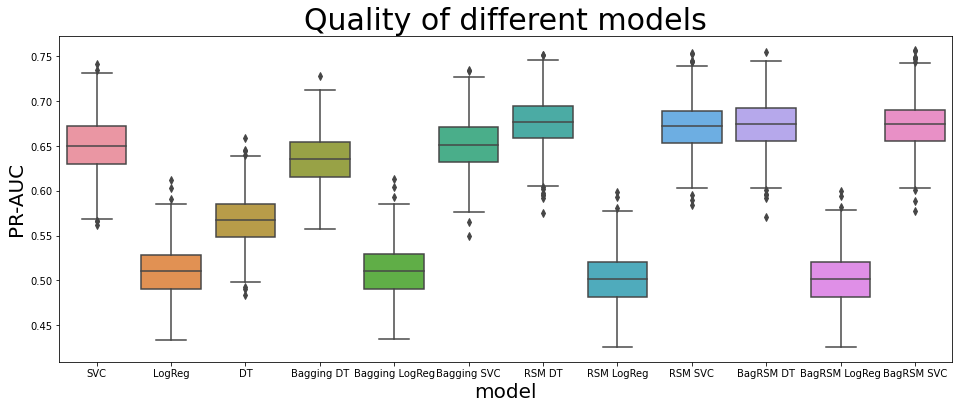

In [93]:
results = pd.DataFrame(boot_scores)
# cast to long format
results = results.melt(value_vars=results.columns,
                       value_name="prauc", 
                       var_name="model") 

plt.figure(figsize=(16,6))
sns.boxplot(data=results, y="prauc", x="model")
plt.xlabel("model", size=20)
plt.ylabel("PR-AUC", size=20)
plt.title("Quality of different models", size=30)
plt.show()

In [94]:
models = {}
models['RF'] = RandomForestRegressor(n_estimators=250,  # for better result set to 1000
                                     max_depth=None, 
                                     min_samples_leaf=1, 
                                     n_jobs=-1, 
                                     random_state=42)
# make pipeline to normalization
models['LinReg'] = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
models['GradientBoostingRegressor'] = GradientBoostingRegressor(learning_rate=0.1, # for better result set to 0.05
                                                                n_estimators=250, # for better result set to 1000
                                                                random_state=42)

# Training models
results_boost = train_and_test_regressor(models, X_train_pca, np.array(Y_train), X_test_pca, np.array(Y_test))

Fitting RF
Fitting LinReg
Fitting GradientBoostingRegressor
Calculating bootstrap score for RF
Calculating bootstrap score for LinReg
Calculating bootstrap score for GradientBoostingRegressor


In [95]:
models

{'GradientBoostingRegressor': GradientBoostingRegressor(n_estimators=250, random_state=42),
 'LinReg': Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                 ('linearregression', LinearRegression())]),
 'RF': RandomForestRegressor(n_estimators=250, n_jobs=-1, random_state=42)}

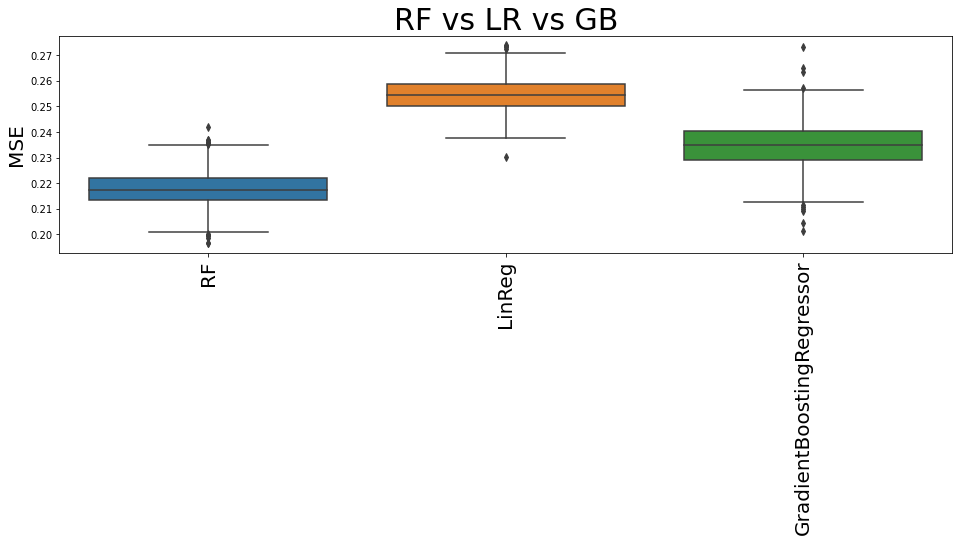

In [96]:
plt.figure(figsize=(16,4))
ax = sns.boxplot(data=results_boost , y="mse", x="model")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("RF vs LR vs GB", size=30)
plt.xticks(size=20)
plt.show()

In [97]:
# here anb below in the cell can be set to 1000 for better visualization

gbtree3 = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01)
gbtree3.fit(X_train_pca, Y_train)

gbtree4 = GradientBoostingRegressor(n_estimators=500, learning_rate=0.001)
gbtree4.fit(X_train_pca, Y_train)

gbtree5 = GradientBoostingRegressor(n_estimators=500, learning_rate=0.0001)
gbtree5.fit(X_train_pca, Y_train)

GradientBoostingRegressor(learning_rate=0.0001, n_estimators=500)

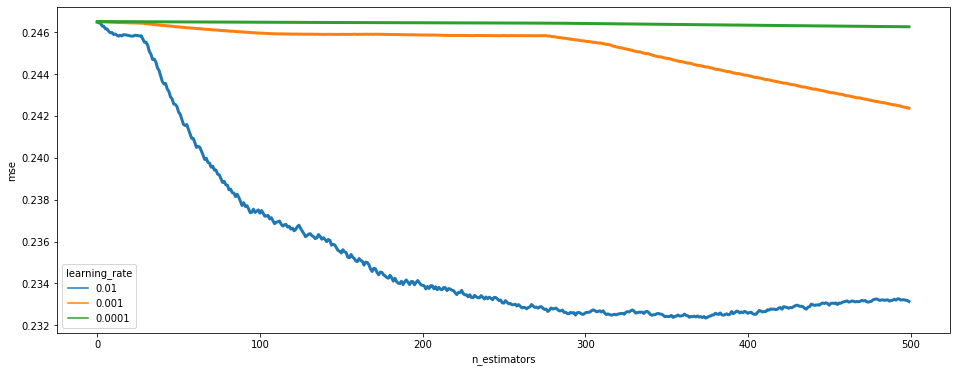

In [98]:
lr = []
step = []
mse = []
for gb_tree in (gbtree3, gbtree4, gbtree5):
    
    for it, Y_test_pred in enumerate(gb_tree.staged_predict(X_test_pca)):

        erte = mean_squared_error(y_true=np.array(Y_test), y_pred=Y_test_pred)
        mse.append(erte)
        lr.append(str(gb_tree.learning_rate))
        step.append(it)

df = pd.DataFrame({"learning_rate":lr, 
                   "n_estimators": step,
                   "mse": mse})

plt.figure(figsize=(16,6))
sns.lineplot(data=df, x='n_estimators', y='mse', hue='learning_rate', lw=3)
plt.show()

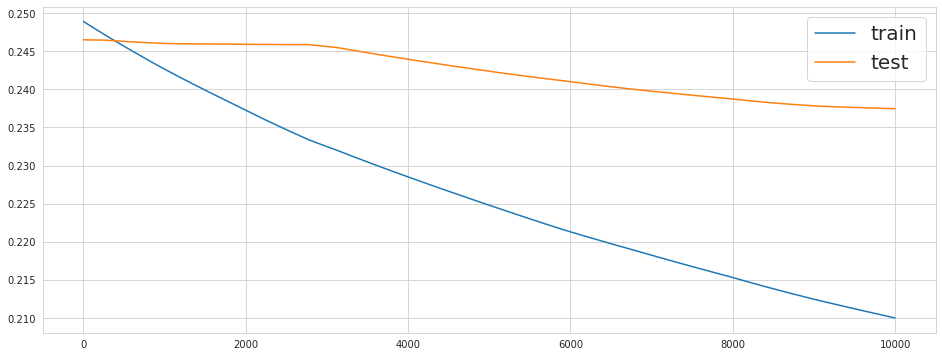

In [50]:
gbtree = GradientBoostingRegressor(n_estimators=10000, learning_rate=0.0001)
gbtree.fit(X_train_pca, Y_train)

error_train = []
error_test = []
for it, (Y_learn_pred, Y_valid_pred) in enumerate(zip(gbtree.staged_predict(X_train_pca), 
                                                     gbtree.staged_predict(X_test_pca))):
    ertr = mean_squared_error(y_true=Y_train, y_pred=Y_learn_pred)
    error_train.append(ertr)
    erte = mean_squared_error(y_true=Y_test, y_pred=Y_valid_pred)
    error_test.append(erte)
    

plt.figure(figsize=(16,6))
plt.plot(error_train, label='train')
plt.plot(error_test, label='test')
plt.legend(fontsize=20)
plt.show()

In [62]:
models = {}
for depth in (5, 6, 7, 8, 9): 
    models[f"GB_depth{depth}"] = GradientBoostingRegressor(n_estimators=500, 
                                   learning_rate=0.1, 
                                   max_depth=depth, 
                                   random_state=42)

# Train model
depth_boost = train_and_test_regressor(models, X_train_pca, np.array(Y_train), X_test_pca, np.array(Y_test))

Fitting GB_depth5
Fitting GB_depth6
Fitting GB_depth7
Fitting GB_depth8
Fitting GB_depth9
Calculating bootstrap score for GB_depth5
Calculating bootstrap score for GB_depth6
Calculating bootstrap score for GB_depth7
Calculating bootstrap score for GB_depth8
Calculating bootstrap score for GB_depth9


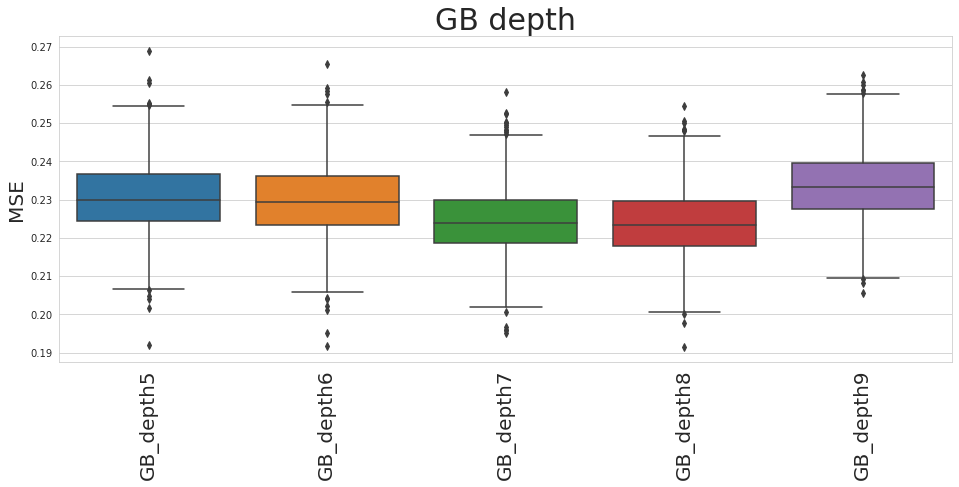

In [63]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data=depth_boost , y="mse", x="model")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("GB depth", size=30)
plt.xticks(size=20)
plt.show()

In [68]:
models = {}
for min_samples_leaf in (8, 9, 10): 
    models[f"GB_mns{min_samples_leaf}"] = GradientBoostingRegressor(n_estimators=500, 
                                   learning_rate=0.01, 
                                   max_depth=8, 
                                   min_samples_leaf=min_samples_leaf, 
                                   random_state=42)

# Train model
mns_boost = train_and_test_regressor(models, X_train_pca, np.array(Y_train), X_test_pca, np.array(Y_test))

Fitting GB_mns8
Fitting GB_mns9
Fitting GB_mns10
Calculating bootstrap score for GB_mns8
Calculating bootstrap score for GB_mns9
Calculating bootstrap score for GB_mns10


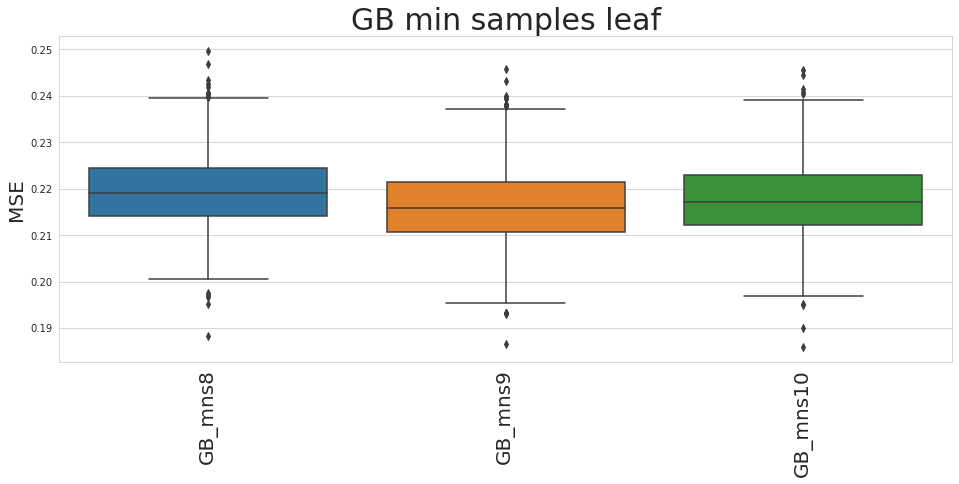

In [69]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data=mns_boost , y="mse", x="model")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("GB min samples leaf", size=30)
plt.xticks(size=20)
plt.show()

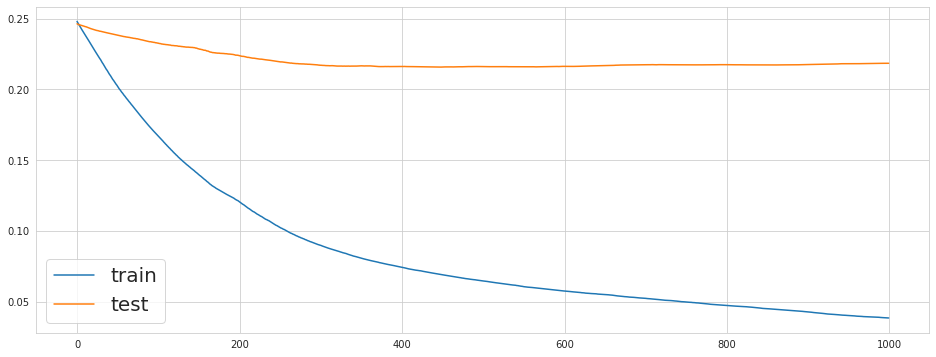

In [73]:
gbtree = GradientBoostingRegressor(n_estimators=1000,
                                   max_depth=8,
                                   min_samples_leaf=9,
                                   learning_rate=0.005,
                                   random_state=42)
gbtree.fit(X_train_pca, np.array(Y_train))

error_train = []
error_test = []
for it, (Y_learn_pred, Y_valid_pred) in enumerate(zip(gbtree.staged_predict(X_train_pca), 
                                                     gbtree.staged_predict(X_test_pca))):
    ertr = mean_squared_error(y_true=np.array(Y_train), y_pred=Y_learn_pred)
    error_train.append(ertr)
    erte = mean_squared_error(y_true=np.array(Y_test), y_pred=Y_valid_pred)
    error_test.append(erte)
    

plt.figure(figsize=(16,6))
plt.plot(error_train, label='train')
plt.plot(error_test, label='test')
plt.legend(fontsize=20)
plt.show()

In [74]:
models = {}

models['RF'] = RandomForestRegressor(n_estimators=250, 
                                     max_depth=None, 
                                     min_samples_leaf=1, 
                                     n_jobs=-1, 
                                     random_state=42)

models['LinReg'] = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

models['GBR'] = GradientBoostingRegressor(learning_rate=0.005, 
                                          n_estimators=250, 
                                          random_state=42)

models['GBR tuned'] = GradientBoostingRegressor(learning_rate=0.005, 
                                                n_estimators=500, 
                                                max_depth=8,
                                                min_samples_leaf=9,
                                                random_state=42)

# Train models
tuned_boost = train_and_test_regressor(models, X_train_pca, np.array(Y_train), X_test_pca, np.array(Y_test))

Fitting RF
Fitting LinReg
Fitting GBR
Fitting GBR tuned
Calculating bootstrap score for RF
Calculating bootstrap score for LinReg
Calculating bootstrap score for GBR
Calculating bootstrap score for GBR tuned


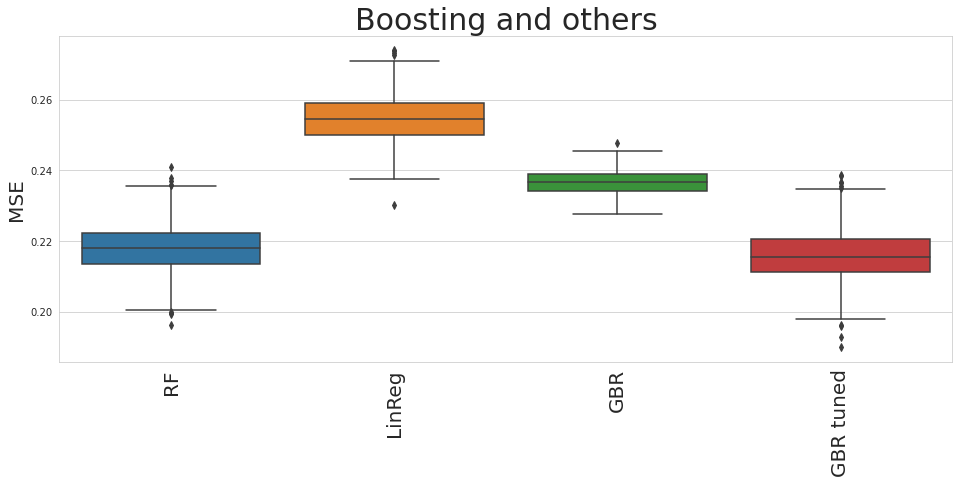

In [75]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data=tuned_boost , y="mse", x="model")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("Boosting and others", size=30)
plt.xticks(size=20)
plt.show()

In [76]:
import xgboost

models_add = {}
models_add['xgb'] = xgboost.XGBRegressor(n_estimators=500,  
                     learning_rate=0.005, 
                     max_depth=8, 
                     random_state=42,
                     min_child_weight=9, # not exact analogue for min_samples_leaf
                     n_jobs=-1, # can be constructed in parrallel, much!!! faster) 
                     objective ='reg:squarederror') 

# Train models
xgb_add = train_and_test_regressor(models_add, X_train_pca, np.array(Y_train), X_test_pca, np.array(Y_test))

Fitting xgb
Calculating bootstrap score for xgb


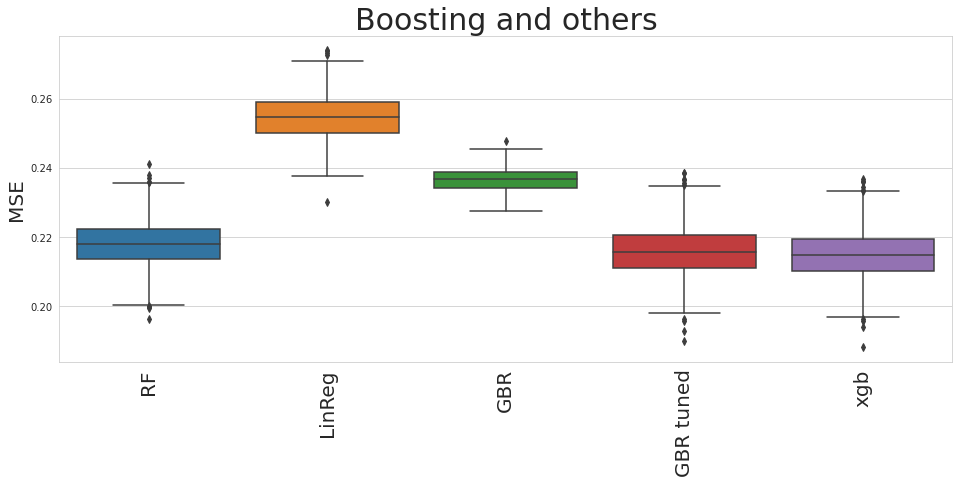

In [77]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data=pd.concat([tuned_boost, xgb_add]) , y="mse", x="model")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("Boosting and others", size=30)
plt.xticks(size=20)
plt.show()

In [83]:
models = {}
for min_child_weight in (12, 13, 14): 
    models[f"XGB_mnw{min_child_weight}"] = xgboost.XGBRegressor(n_estimators=2000,  
                     learning_rate=0.005, 
                     max_depth=8, 
                     random_state=42,
                     min_child_weight=min_child_weight,                                          
                     n_jobs=-1,
                     objective ='reg:squarederror')

# Train models
xgb_mw = train_and_test_regressor(models, X_train_pca, np.array(Y_train), X_test_pca, np.array(Y_test))

Fitting XGB_mnw12
Fitting XGB_mnw13
Fitting XGB_mnw14
Calculating bootstrap score for XGB_mnw12
Calculating bootstrap score for XGB_mnw13
Calculating bootstrap score for XGB_mnw14


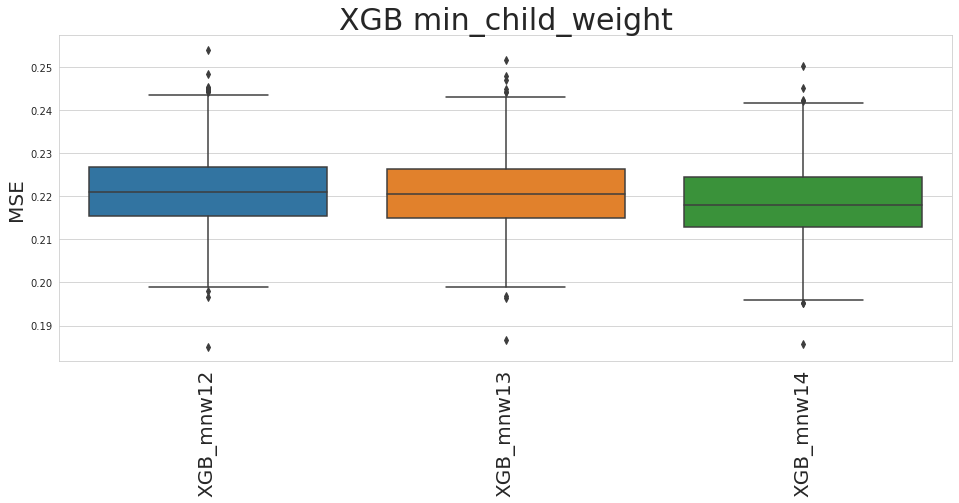

In [84]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data=xgb_mw, y="mse", x="model")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("XGB min_child_weight", size=30)
plt.xticks(size=20)
plt.show()

In [85]:
models_add2 = {}
models_add2['xgb_mcw'] = xgboost.XGBRegressor(n_estimators=2000,  
                     learning_rate=0.005, 
                     max_depth=8, 
                     random_state=42,
                     min_child_weight=14,
                     n_jobs=-1,
                     objective ='reg:squarederror')

# Train models
xgb_add2 = train_and_test_regressor(models_add2, X_train_pca, np.array(Y_train), X_test_pca, np.array(Y_test))

Fitting xgb_mcw
Calculating bootstrap score for xgb_mcw


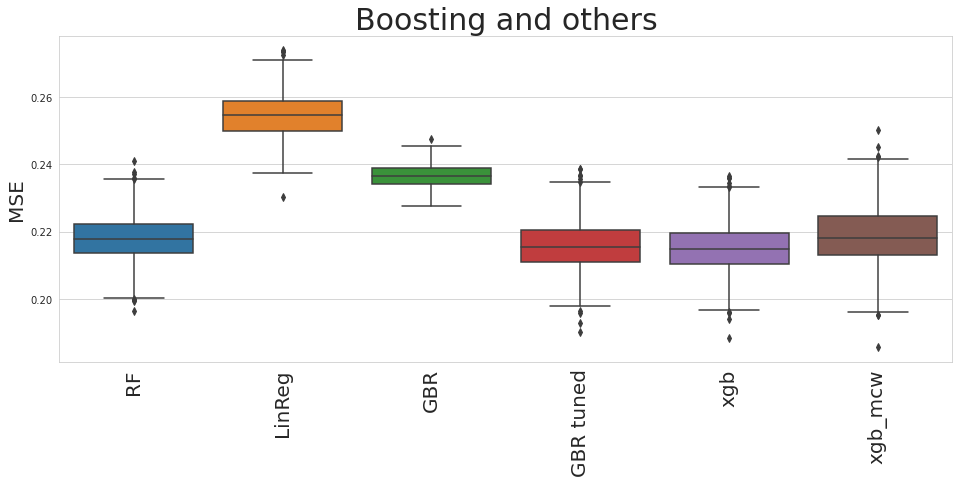

In [86]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data=pd.concat([tuned_boost, xgb_add, xgb_add2]) , y="mse", x="model")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("Boosting and others", size=30)
plt.xticks(size=20)
plt.show()

In [87]:
import lightgbm

models_add3 = {}
models_add3['lightgbm'] = lightgbm.LGBMRegressor(n_estimators=2000, # can use more estimators due to SPEEEEEED 
                     learning_rate=0.005, 
                     max_depth=-1,
                     num_leaves=2**5,                       
                     random_state=42,
                     min_child_weight=9,
                     n_jobs=-1)

# Train models
lgb_add = train_and_test_regressor(models_add3, X_train_pca, np.array(Y_train), X_test_pca, np.array(Y_test))

Fitting lightgbm
Calculating bootstrap score for lightgbm


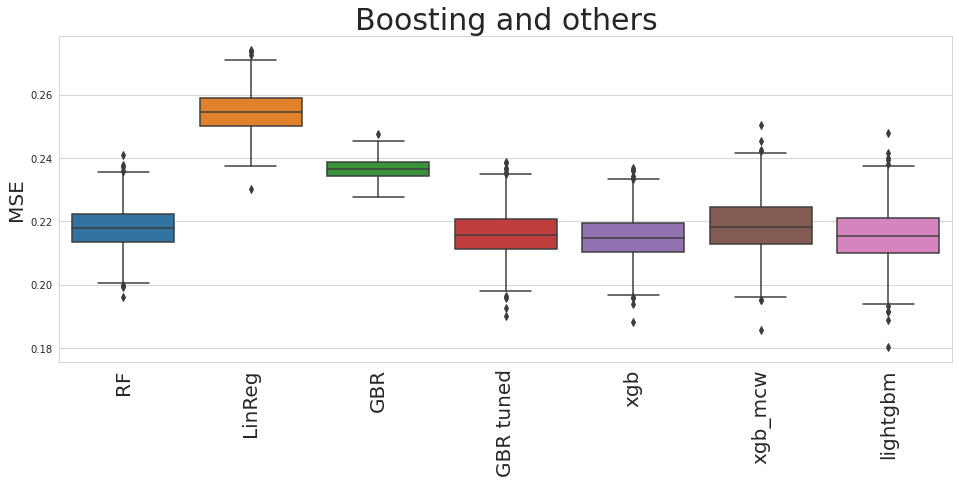

In [88]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data=pd.concat([tuned_boost, xgb_add, xgb_add2, lgb_add]) , y="mse", x="model")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("Boosting and others", size=30)
plt.xticks(size=20)
plt.show()

In [89]:
models = {}
for num_leaves in (8, 16, 24, 32, 40): 
    models[f"LGB_lvn{num_leaves}"] =  lightgbm.LGBMRegressor(n_estimators=2000,  
                     learning_rate=0.005, 
                     max_depth=-1,
                     num_leaves=num_leaves,                       
                     random_state=42,
                     min_child_weight=10,
                     n_jobs=-1)

# Train models
lgb_nl = train_and_test_regressor(models, X_train_pca, np.array(Y_train), X_test_pca, np.array(Y_test))

Fitting LGB_lvn8
Fitting LGB_lvn16
Fitting LGB_lvn24
Fitting LGB_lvn32
Fitting LGB_lvn40
Calculating bootstrap score for LGB_lvn8
Calculating bootstrap score for LGB_lvn16
Calculating bootstrap score for LGB_lvn24
Calculating bootstrap score for LGB_lvn32
Calculating bootstrap score for LGB_lvn40


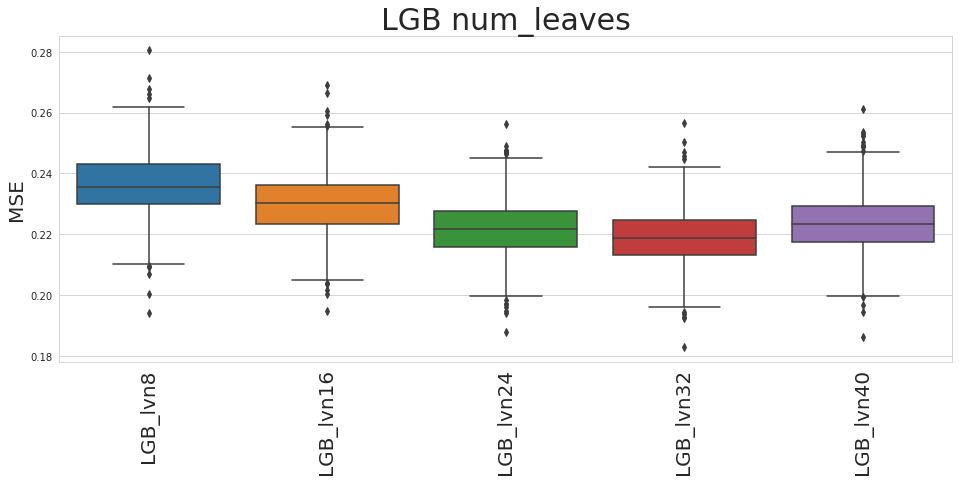

In [90]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data=lgb_nl, y="mse", x="model")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("LGB num_leaves", size=30)
plt.xticks(size=20)
plt.show()

In [95]:
models = {}
for num_leaves in (16, 18, 20, 22, 24): 
    models[f"LGB_nl{num_leaves}"] =  lightgbm.LGBMRegressor(n_estimators=2000,  
                     learning_rate=0.005, 
                     max_depth=-1,
                     num_leaves=num_leaves,                       
                     random_state=42,
                     min_child_weight=10,
                     n_jobs=-1) 

# Train models
lgb_nl = train_and_test_regressor(models, X_train_pca, np.array(Y_train), X_test_pca, np.array(Y_test))

Fitting LGB_nl16
Fitting LGB_nl18
Fitting LGB_nl20
Fitting LGB_nl22
Fitting LGB_nl24
Calculating bootstrap score for LGB_nl16
Calculating bootstrap score for LGB_nl18
Calculating bootstrap score for LGB_nl20
Calculating bootstrap score for LGB_nl22
Calculating bootstrap score for LGB_nl24


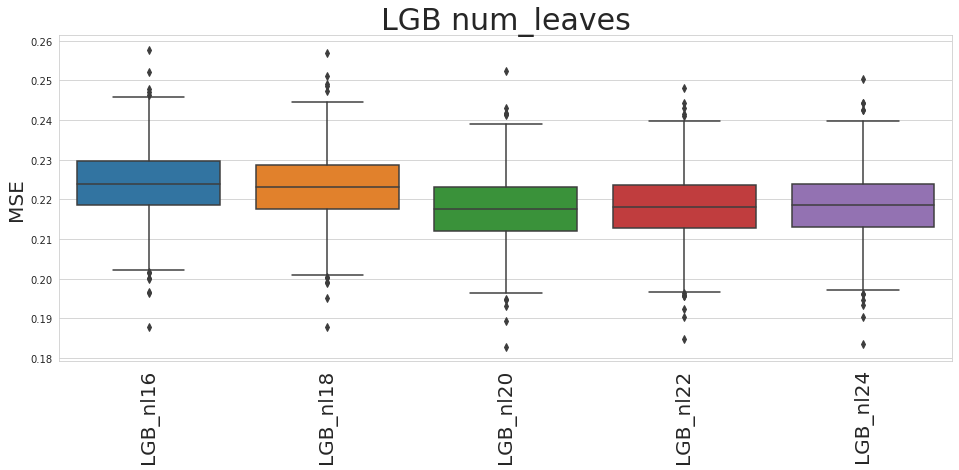

In [96]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data=lgb_nl, y="mse", x="model")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("LGB num_leaves", size=30)
plt.xticks(size=20)
plt.show()

In [97]:
models_add4 = {}
models_add4['lightgbm lv12'] = lightgbm.LGBMRegressor(n_estimators=2000,  
                     learning_rate=0.005, 
                     max_depth=-1,
                     num_leaves=20,                       
                     random_state=42,
                     min_child_weight=9,
                     n_jobs=-1) 

# Train models
lgb_add2 = train_and_test_regressor(models_add4, X_train_pca, np.array(Y_train), X_test_pca, np.array(Y_test))

Fitting lightgbm lv12
Calculating bootstrap score for lightgbm lv12


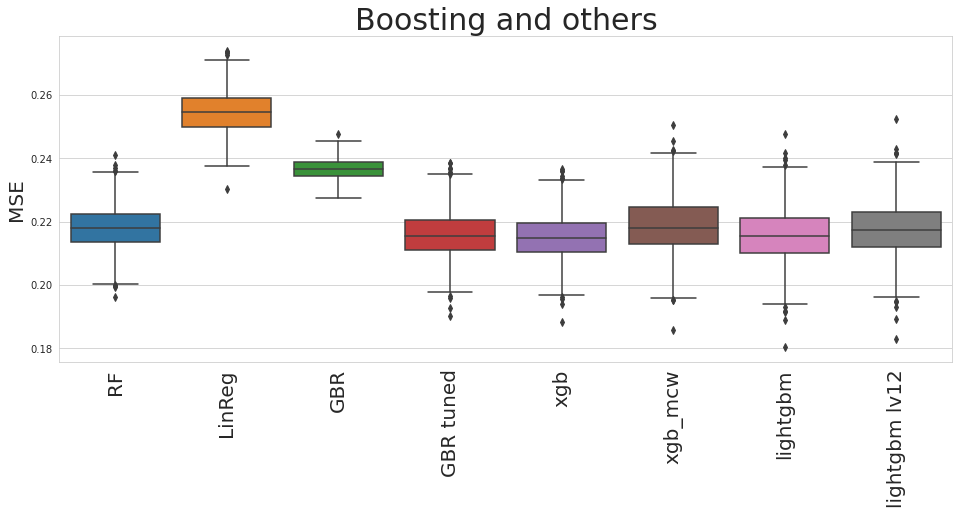

In [98]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data=pd.concat([tuned_boost, xgb_add, xgb_add2, lgb_add, lgb_add2]) , y="mse", x="model")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("Boosting and others", size=30)
plt.xticks(size=20)
plt.show()

In [100]:
models_add4

{'lightgbm lv12': LGBMRegressor(learning_rate=0.005, min_child_weight=9, n_estimators=2000,
               num_leaves=20, random_state=42)}

In [202]:
models_add = {}
models_add['xgb'] = xgboost.XGBClassifier(n_estimators=100000,  
                     learning_rate=0.001, 
                     max_depth=8, 
                     random_state=42,
                     min_child_weight=11, # not exact analogue for min_samples_leaf
                     n_jobs=-1, # can be constructed in parrallel, much!!! faster) 
                     objective ='reg:squarederror') 

# Train models
xgb_add = train_and_test_regressor(models_add, X_train_pca, np.array(Y_train), X_test_pca, np.array(Y_test))

Fitting xgb
Calculating bootstrap score for xgb


In [198]:
y_pred_test = models_add['xgb'].predict(X_test_pca)

In [199]:
# Compute accuracy based on test samples
acc = accuracy_score(Y_test, y_pred_test)

In [200]:
acc

0.6649006622516557

NameError: ignored